In [1]:
# All necessary import 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
# Let's get our data
KDDtrain_path = '..\\nsl-kdd\KDDTrain+.txt'
KDDtest_path = '..\\nsl-kdd\KDDTest+.txt'

KDDtrain_df = pd.read_csv(KDDtrain_path)
KDDtest_df = pd.read_csv(KDDtest_path)


In [4]:
# First glance
KDDtrain_df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


The NSL-KDD dataset contains network traffic data generated in a controlled environment, simulating various types of attacks and normal activities.

In [3]:
# The data doesn't have a header let's take care of it
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])


# NSL-KDD Dataset Attribute Explanation

Each row in the NSL-KDD dataset represents a network connection record. This record summarizes a network connection established between a client and a server. Here's an explanation of the attributes in the dataset:

1. **`duration`**: The length of time of the connection in seconds.

2. **`protocol_type`**: The protocol used in the connection. It can be one of three values: 'tcp', 'udp', or 'icmp'.

3. **`service`**: The network service on the destination, represented as various protocols and applications.

4. **`flag`**: Indicates the status of the connection. It can have values like 'SF' (normal establishment and termination), 'REJ' (connection request was rejected), 'S0' (connection attempt seen, no reply), etc.

5. **`src_bytes`**: The number of data bytes from source to destination in the connection.

6. **`dst_bytes`**: The number of data bytes from destination to source in the connection.

7. **`land`**: Binary attribute indicating whether the connection is from/to the same host/port. '1' means yes, '0' means no.

8. **`wrong_fragment`**: The number of wrong fragments in the connection.

9. **`urgent`**: The number of urgent packets in the connection.

10. **`hot`**: The count of "hot" indicators (such as access to sensitive system files).

11. **`num_failed_logins`**: Number of failed login attempts.

12. **`logged_in`**: Binary attribute indicating whether the user is logged in ('1') or not ('0').

13. **`num_compromised`**: Number of compromised conditions.

14. **`root_shell`**: Binary attribute indicating whether the root shell is obtained ('1') or not ('0').

15. **`su_attempted`**: Binary attribute indicating whether 'su root' command attempted ('1') or not ('0').

16. **`num_root`**: Number of root accesses.

17. **`num_file_creations`**: Number of file creation operations.

18. **`num_shells`**: Number of shell prompts.

19. **`num_access_files`**: Number of operations on access control files.

20. **`num_outbound_cmds`**: Number of outbound commands in an ftp session.

21. **`is_host_login`**: Binary attribute indicating whether the login belongs to the "host list" ('1') or not ('0').

22. **`is_guest_login`**: Binary attribute indicating whether the login is a "guest" login ('1') or not ('0').

23. **`count`**: Number of connections to the same host as the current connection in the past two seconds.

24. **`srv_count`**: Number of connections to the same service as the current connection in the past two seconds.

25. **`serror_rate`**: The percentage of connections that have 'SYN' errors.

26. **`srv_serror_rate`**: The percentage of connections that have 'SYN' errors to the same service.

27. **`rerror_rate`**: The percentage of connections that have 'REJ' errors.

28. **`srv_rerror_rate`**: The percentage of connections that have 'REJ' errors to the same service.

29. **`same_srv_rate`**: The percentage of connections to the same service.

30. **`diff_srv_rate`**: The percentage of connections to different services.

31. **`srv_diff_host_rate`**: The percentage of connections to different hosts.

32. **`dst_host_count`**: Number of connections to the same host in the past two seconds.

33. **`dst_host_srv_count`**: Number of connections to the same service as the current connection in the past two seconds.

34. **`dst_host_same_srv_rate`**: The percentage of connections to the same service among the connections to that host.

35. **`dst_host_diff_srv_rate`**: The percentage of connections to different services among the connections to that host.

36. **`dst_host_same_src_port_rate`**: The percentage of connections to the same source port among the connections to that host.

37. **`dst_host_srv_diff_host_rate`**: The percentage of connections to different hosts among the connections to the same service.

38. **`dst_host_serror_rate`**: The percentage of connections that have 'SYN' errors to the same host.

39. **`dst_host_srv_serror_rate`**: The percentage of connections that have 'SYN' errors to the same service on the same host.

40. **`dst_host_rerror_rate`**: The percentage of connections that have 'REJ' errors to the same host.

41. **`dst_host_srv_rerror_rate`**: The percentage of connections that have 'REJ' errors to the same service on the same host.

42. **`outcome`**: The label indicating whether the connection is a normal connection ('normal') or an anomaly ('anomaly').

43. **`level`**: Represents the severity level of the attack, if it is an attack.


Each row in the dataset represents a network connection record with these attributes. The goal is to predict whether a network connection is normal or malicious based on these features.


In [4]:
# Let's assign the name of the columns
KDDtrain_df.columns = columns
KDDtrain_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
KDDtrain_df['protocol_type'].unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

In [6]:
# Let's get more informations about our data
KDDtrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [7]:
# Let's do the same for our test data.
KDDtest_df.columns = columns
KDDtest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

# Summary of the Data

## Training Dataset:

- **Number of Rows:** 125,972 entries
- **Number of Columns:** 43 columns in total
- **Data Types:**
  - **Integer (int64):** 24 columns contain integer values
  - **Float (float64):** 15 columns contain floating-point values
  - **Object:** 4 columns contain object (likely string or categorical) data types
- **Missing Values:** No missing values in any column (all columns have 125,972 non-null entries)
- **Memory Usage:** Approximately 41.3 MB

## Test Dataset:

- **Number of Rows:** 22,543 entries
- **Number of Columns:** 43 columns in total (same as the training dataset)
- **Data Types:**
  - **Integer (int64):** 24 columns contain integer values
  - **Float (float64):** 15 columns contain floating-point values
  - **Object:** 4 columns contain object (likely string or categorical) data types
- **Missing Values:** No missing values in any column (all columns have 22,543 non-null entries)
- **Memory Usage:** Approximately 7.4 MB


In [8]:
# Let's get more statistics
KDDtrain_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [9]:
KDDtest_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


# Classes of Attacks

Before we dive into visualizing the data, let's take a look at the different classes of attacks in the NSL-KDD dataset, as documented:

- **Normal:** Represents normal network connections without any intrusion or attack.
- **DOS (Denial of Service):** Includes attacks that aim to overwhelm the targeted system or network, making it unavailable to users.
- **Probe:** Represents network reconnaissance activities where an attacker tries to gather information about the target system or network.
- **R2L (Unauthorized access from a remote machine):** Includes attacks where an attacker gains unauthorized access to the target system from a remote machine.
- **U2R (Unauthorized access to local superuser privileges):** Represents attacks where an attacker gains unauthorized access and attempts to exploit local privileges to gain superuser rights on the target system.

Understanding these attack categories is essential for a comprehensive analysis of the NSL-KDD dataset.


In [10]:
#let's visualize our data for a better overall understanding.

# Function to create and display pie plots for specified columns in the DataFrame
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

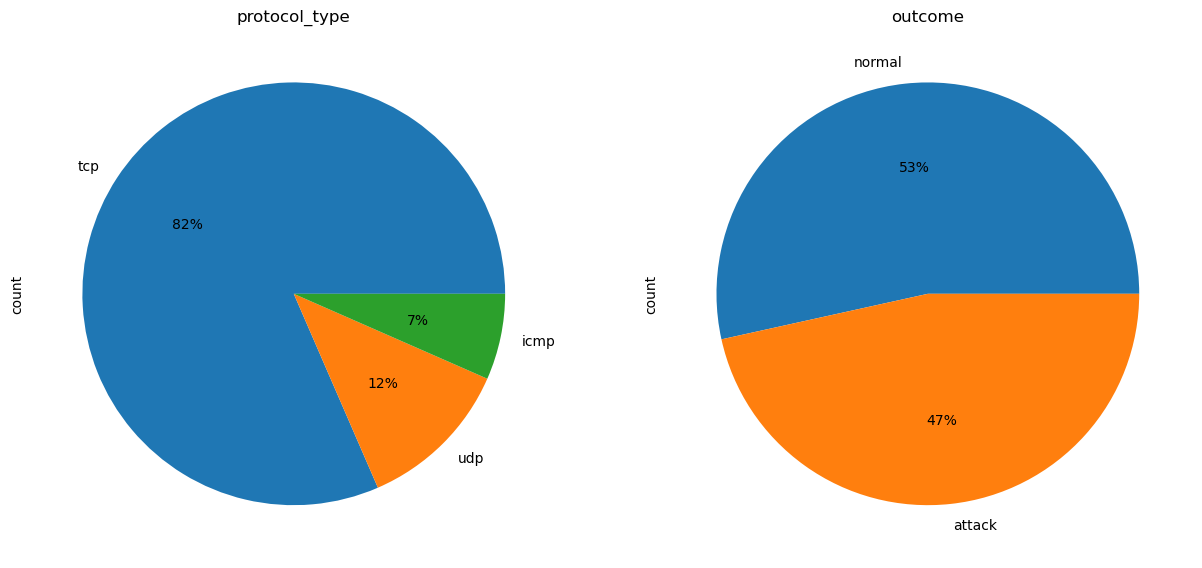

In [11]:
#Let's separate attacks from non-attacks then plot 
KDDtrain_df.loc[KDDtrain_df['outcome'] == "normal", "outcome"] = 'normal'
KDDtrain_df.loc[KDDtrain_df['outcome'] != 'normal', "outcome"] = 'attack'
pie_plot(KDDtrain_df,['protocol_type','outcome'],1 ,2)

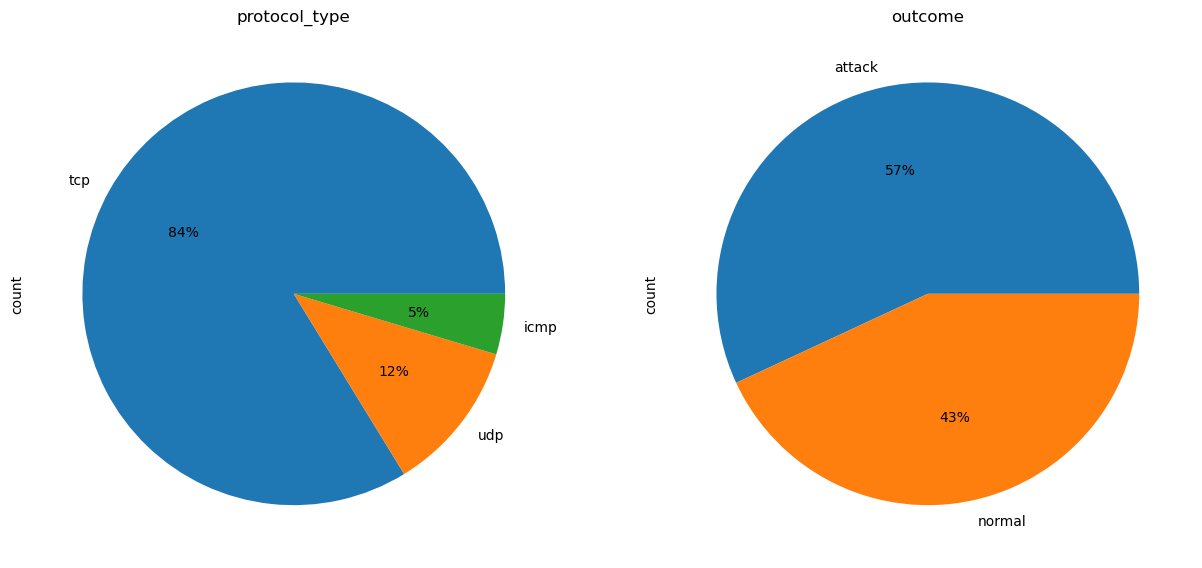

In [12]:
#Same for our test set
KDDtest_df.loc[KDDtest_df['outcome'] == "normal", "outcome"] = 'normal'
KDDtest_df.loc[KDDtest_df['outcome'] != 'normal', "outcome"] = 'attack'
pie_plot(KDDtest_df,['protocol_type','outcome'],1 ,2)

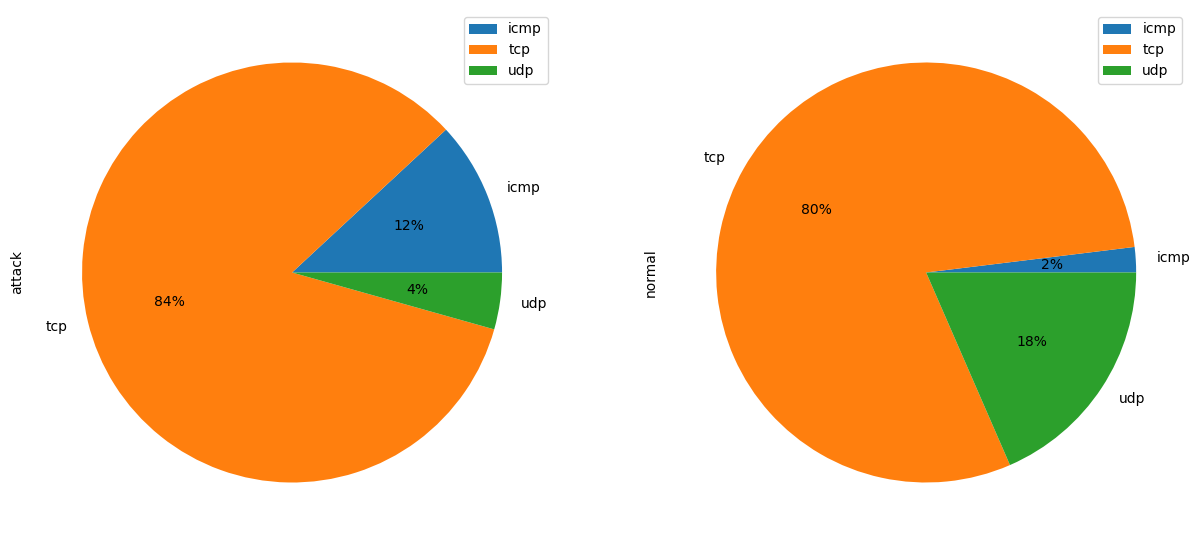

In [13]:
#Let's check if there's balance between the protocols
# Function to create and display merged pie chart for outcome and protocol type
def merged_pie_plot(df):
    # Grouping data by 'protocol_type' and 'outcome', counting occurrences, and unstacking the result
    grouped_data = df.groupby(['protocol_type', 'outcome']).size().unstack()
    # Plotting merged pie chart
    grouped_data.plot(kind='pie', subplots=True, layout=(2, 2), figsize=(15, 15), autopct='%1.0f%%')
    plt.show()

# Call the function with your DataFrame
merged_pie_plot(KDDtrain_df)


## Outcome Distribution:

**Normal vs. Attacks:** The data consists of approximately 53% normal network connections and 47% attacks for the training set and 57% normal network connections and 43% attacks for the testing set. This balanced distribution is crucial for training an effective intrusion detection system.

**Distribution per protocol**  The distribution of attacks is similar across the different protocols, with the exception of the ICMP protocol, which has a higher percentage of attacks than the other protocols.


# Data preprocessing

In [14]:
# Scaler function

def Scaling(df_num, cols):
    std_scaler = RobustScaler()     #We used robust for it's resilience to outliers and preservation of outlier information
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [15]:
# Preprocessing function

cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome'] # catergorical columns
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)   # leaving only numeric data before scaling
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0  # outcome label 0 for normal network activity
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1 # outcome label 1 for attack or suspicious activity
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag']) # One hot encoding the non numeric categorical data
    return dataframe
# One-hot encoding creates binary columns for each category within the categorical variables, expanding the dataset.
# We will later use PCA (Principal Component Analysis) for dimensionality reduction.

In [16]:
scaled_train = preprocess(KDDtrain_df) 

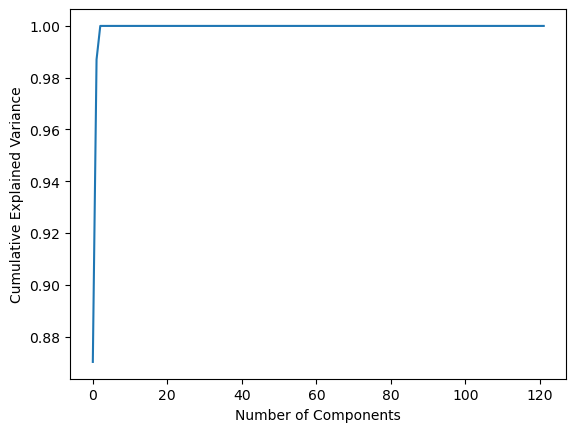

In [17]:
# Explained variance ratio to determine number of components to keep

x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

pca = PCA()
pca.fit(x)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
# We can see that 20 components explain more than 90% of the variance in the data. We will use 20 components for our model.



In [18]:
# Dimensionality reduction

x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values


# Principal Component Analysis
pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

# Data splitting
y = y.astype('int') # Target needs to be an integer
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 122 and of reduced features is 20
